In [1]:
import pandas as pd
#Carga de datos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='utf-8')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-1-2125804881.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", encoding='utf-8')


/tmp/ipython-input-2-3762887055.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})


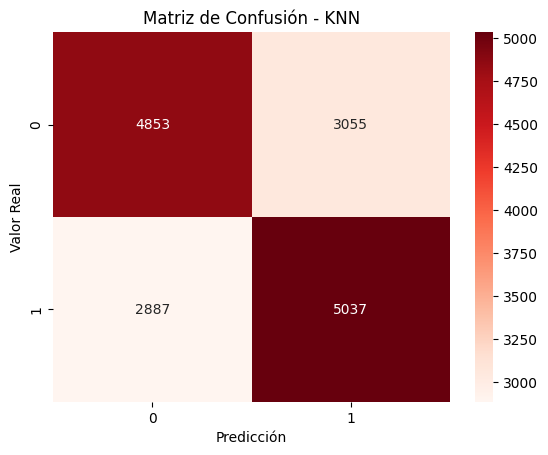

In [2]:
# ----------------- LIBRERÍAS -----------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- FILTRADO Y FEATURES -----------------
df['RoundWinner'] = df['RoundWinner'].astype(str).str.strip()
df = df[df['RoundWinner'].isin(['True', 'False'])]
df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})
df = df[df['AbnormalMatch'] == False]

# Ingeniería de características
df['MatchImpact'] = df['MatchKills'] + df['MatchAssists'] + df['MatchHeadshots']
df['RoundEfficiency'] = df['RoundKills'] / (df['RoundStartingEquipmentValue'] + 1)
df['GrenadeTotal'] = df['RLethalGrenadesThrown'] + df['RNonLethalGrenadesThrown']

# Variables seleccionadas
features = [
    'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol',
    'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
    'MatchImpact', 'RoundEfficiency', 'GrenadeTotal'
]

X = df[features]
y = df['RoundWinner']

# División 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- ENTRENAMIENTO KNN -----------------
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# ----------------- PREDICCIÓN -----------------
y_pred_knn = modelo_knn.predict(X_test)

# ----------------- MATRIZ DE CONFUSIÓN -----------------
matriz_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(matriz_knn, annot=True, fmt='d', cmap='Reds')
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()



Reporte de Clasificación - KNN
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      7908
           1       0.62      0.64      0.63      7924

    accuracy                           0.62     15832
   macro avg       0.62      0.62      0.62     15832
weighted avg       0.62      0.62      0.62     15832



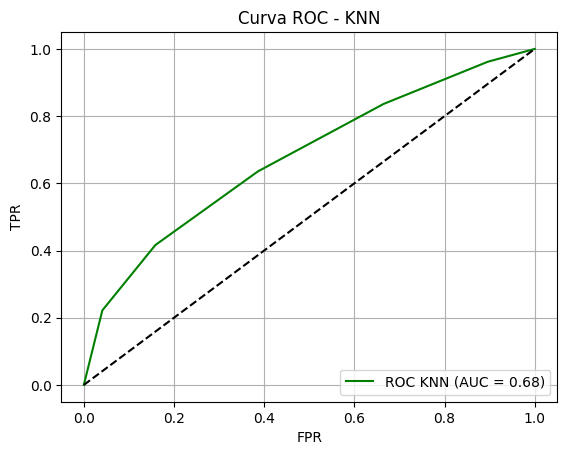

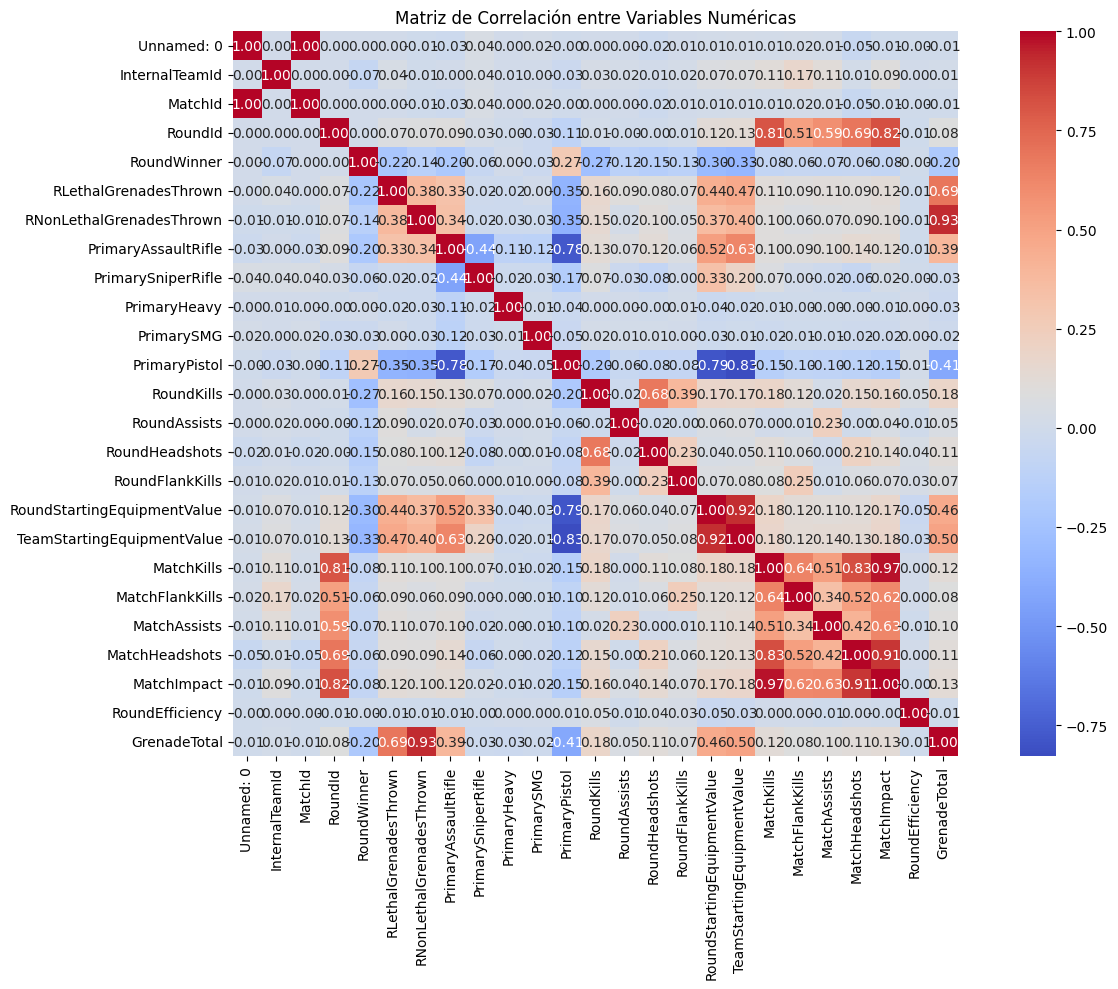

In [3]:
# ----------------- MÉTRICAS -----------------
print("Reporte de Clasificación - KNN")
print(classification_report(y_test, y_pred_knn))

# ----------------- CURVA ROC -----------------
y_probs_knn = modelo_knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC KNN (AUC = {roc_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC - KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
df_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlacion = df_numericas.corr()

# Generar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()